# 2.- Exploratory Data Analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

%run lib.ipynb

## Load data from cleaned data set

In [16]:
data = pd.read_excel("data_cleaned.xlsx")
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       564 non-null    int64  
 1   DIABETES                                                                   564 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 564 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           564 non-null    object 
 5   VOLUMEN PROSTATICO                                                         564 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

### Review categorical data

/tmp/ipykernel_10844/3388424809.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10844/3388424809.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10844/3388424809.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10844/3388424809.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_10844/3388424809.py:28: UserWarning: set_ticklabels() should only be 

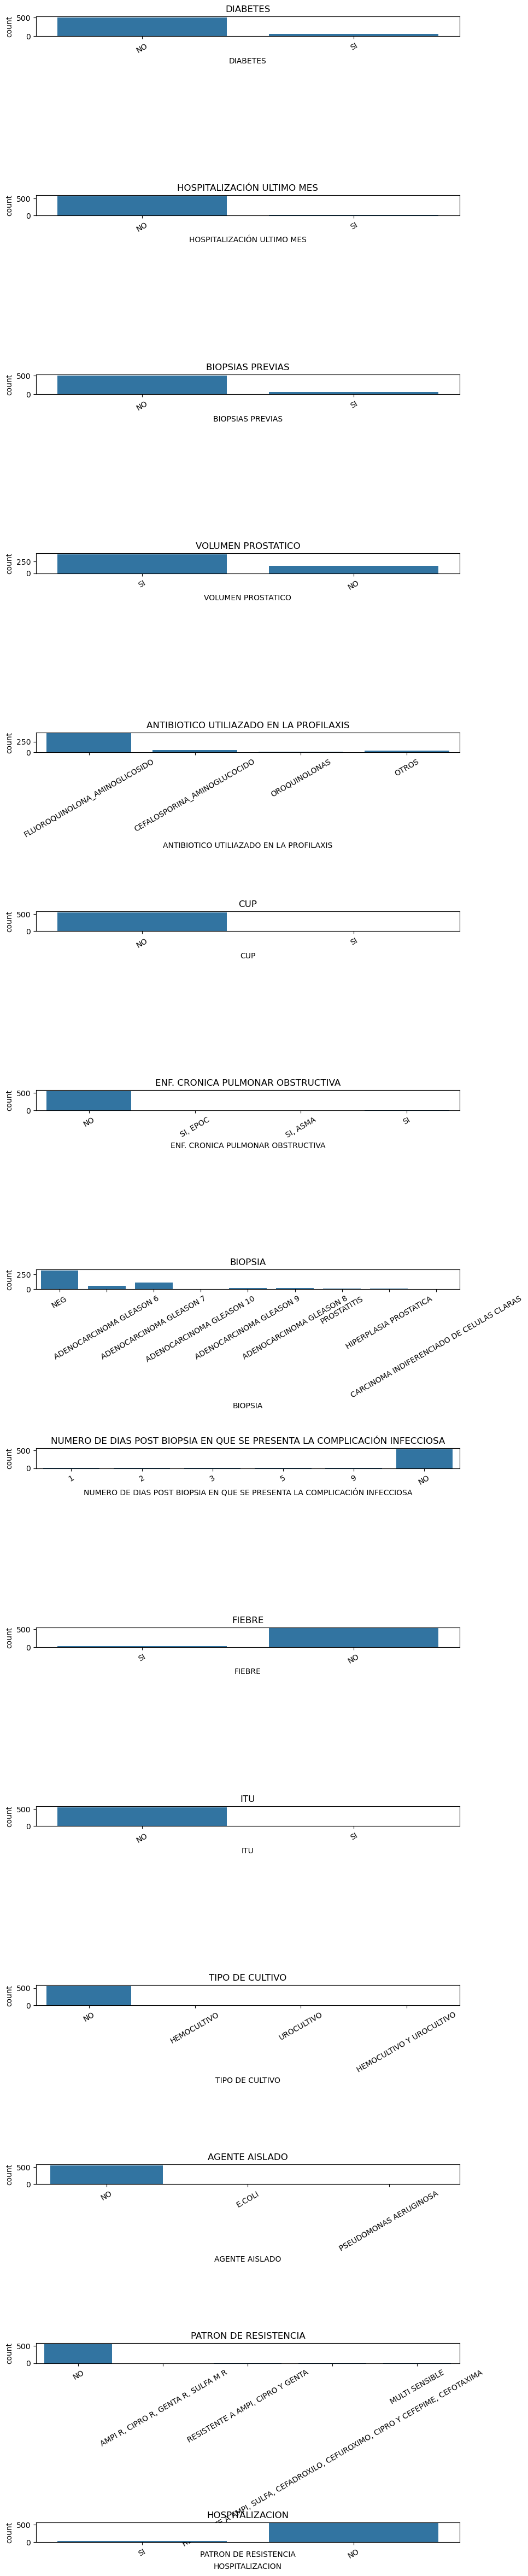

In [17]:
cat_cols = data.select_dtypes(include=['object']).columns
count_plot(data, cat_cols)

#### Some considerations:
- DIABETES: can take yes or no values.
- HOSPITALIZACIÓN ULTIMO MES: can take yes or no values.
- BIOPSIAS PREVIAS: can take yes or no values.
- VOLUMEN PROSTATICO: can take yes or no values.
- ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS: have 4 possible values.
- CUP: can take yes or no values.
- ENF. CRONICA PULMONAR OBSTRUCTIVA: have 4 possible values.
- BIOPSIA: have 9 possible values.
- NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA: have 6 possible values.  The number of days and "NO" when the pacient does not have the complication.
- FIEBRE: can take yes or no values.
- ITU: can take yes or no values.
- TIPO DE CULTIVO: have 4 possible values.
- AGENTE AISLADO: have 3 possible values.
- PATRON DE RESISTENCIA: have 5 possible values.
- HOSPITALIZACION (this is our "y"): can take yes or no values.

### Review numerical data

In [18]:
data.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,63.531915,13.313698,12.989362,0.166667,0.014184
std,7.933384,15.660170,3.923318,0.961361,0.197167
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.675000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,84.000000,100.000000,24.000000,12.000000,3.000000


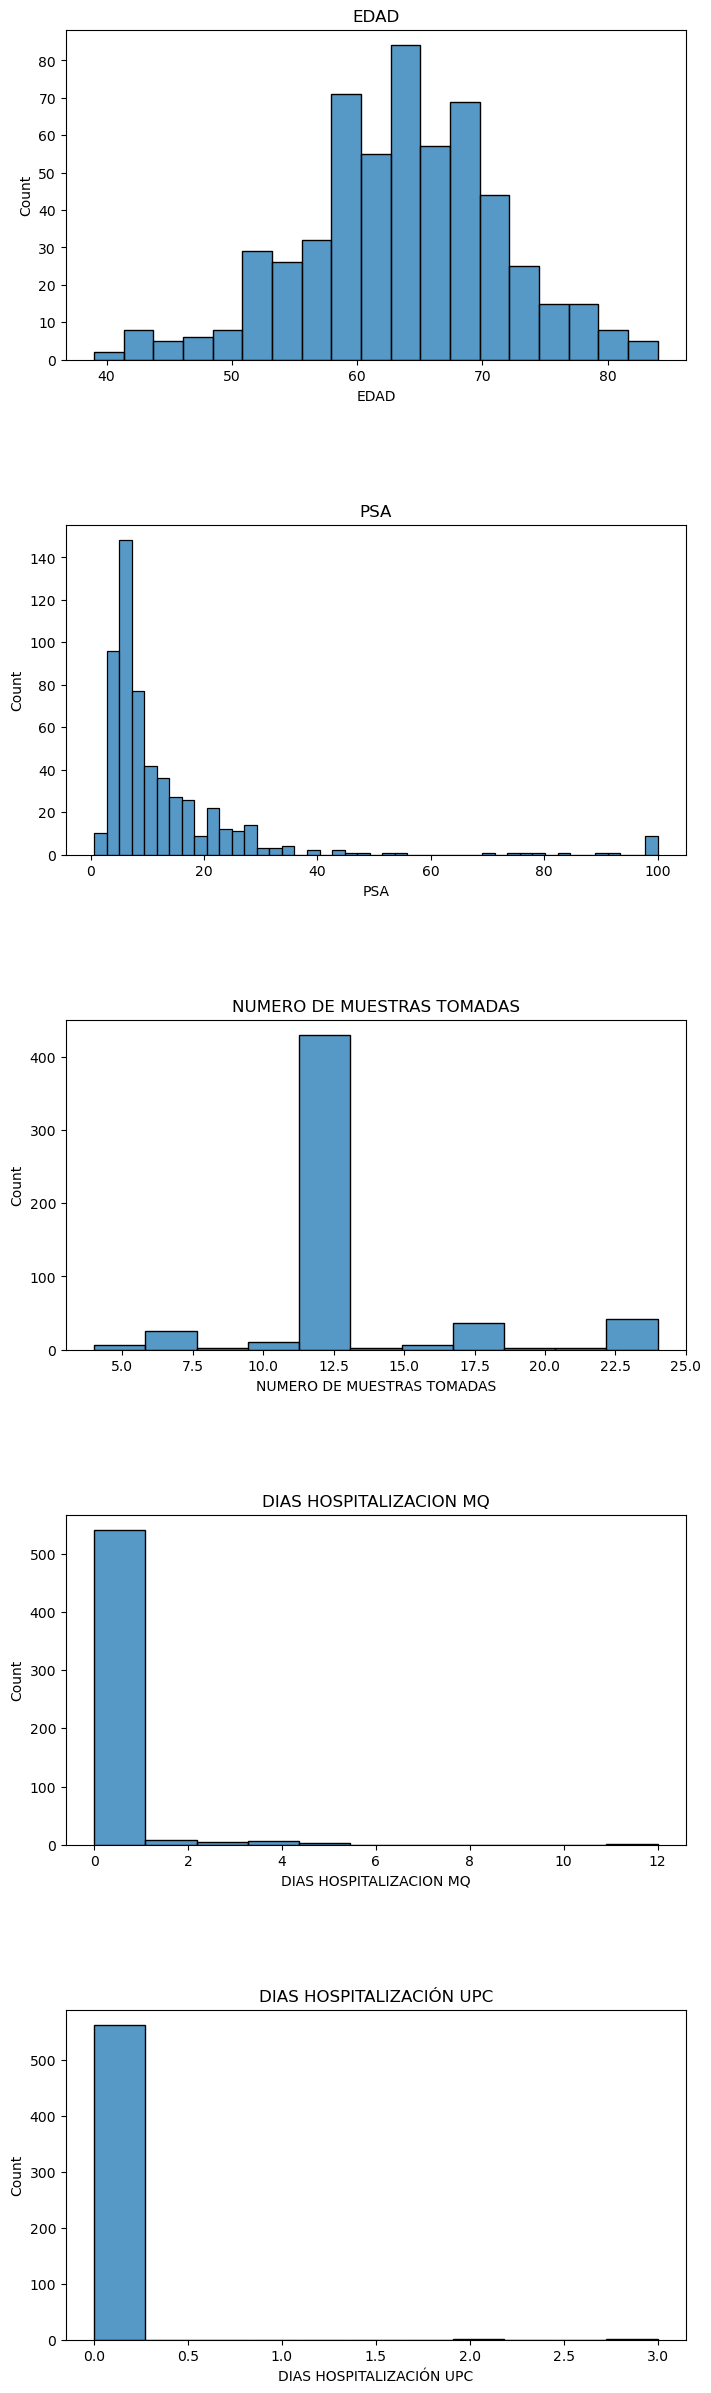

In [19]:
num_cols = data.select_dtypes(exclude=['object']).columns
histogram_graph(data, num_cols)

#### Some considerations:
- Most patients are over 60 years old.
- 75% of patients have PSA less than 15.
- Most patients had 12 samples taken.
- For DIAS HOSPITALIZACION MQ and DIAS HOSPITALIZACIÓN UPC, they are a consequence so we will eliminate them from the data set

In [20]:
data.drop(columns=['DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'], inplace=True)
num_cols = data.select_dtypes(exclude=['object']).columns

### One variable Analysis

In [21]:
dictionary = {'SI': 1, 'NO': 0}
y = data['HOSPITALIZACION'].apply(lambda x: dictionary[x])
data['y'] = y
print(f'The mean of y is {data["y"].mean()}') 

The mean of y is 0.0425531914893617


#### Relation between numerical variables and y ("HOSPITALIZACION")

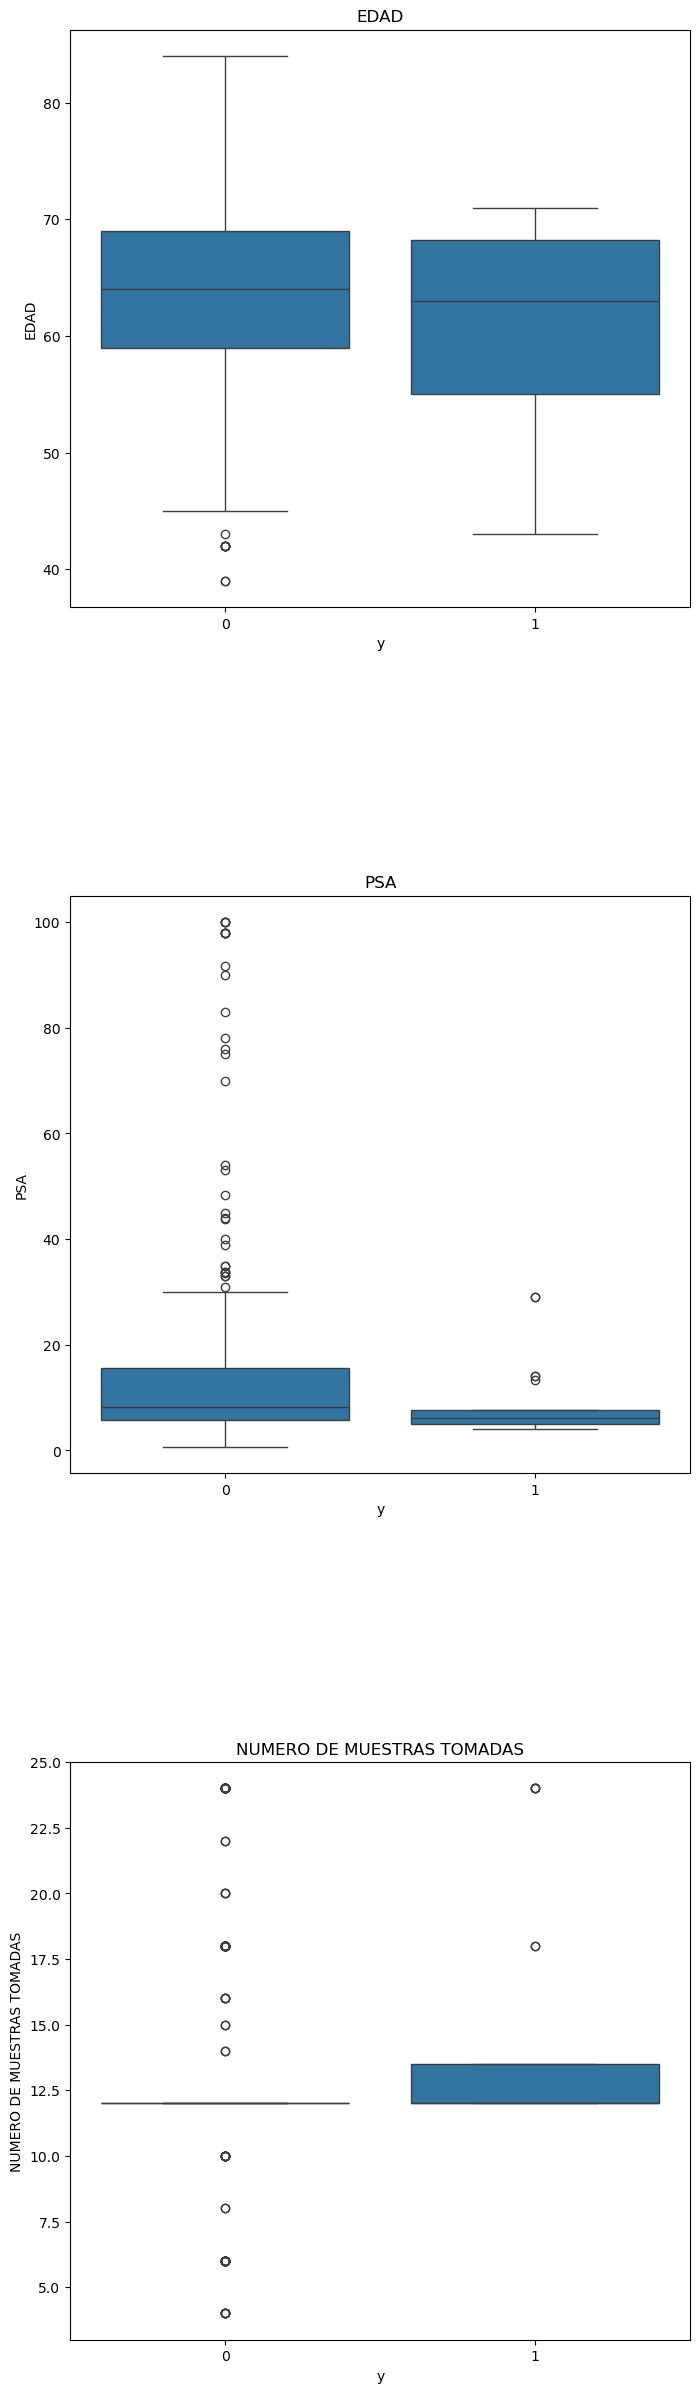

In [22]:
fig, ax = plt.subplots(nrows=num_cols.shape[0], ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, col in enumerate(num_cols):
    sns.boxplot(data=data, x="y", y=col, ax=ax[i])        
    ax[i].set_title(col)


- The age range are similar between the positive and negative "y" values.
- The PSA range are lower than 15 in the mos cases of positive hospitalization.
- All the positive cases have, at least, 12 samples ("NUMERO DE MUESTRAS TOMADAS") taken.

### Relation Between categorical variables and y ("HOSPITALIZACION")

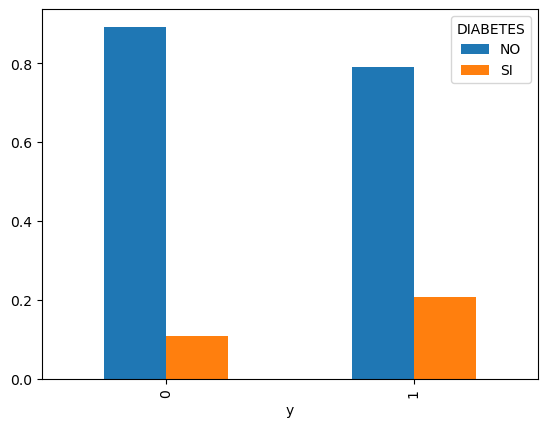

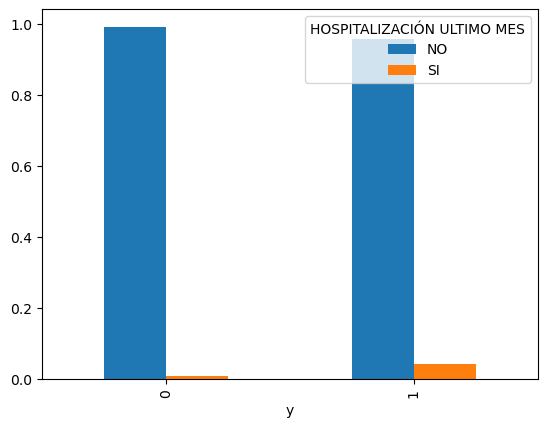

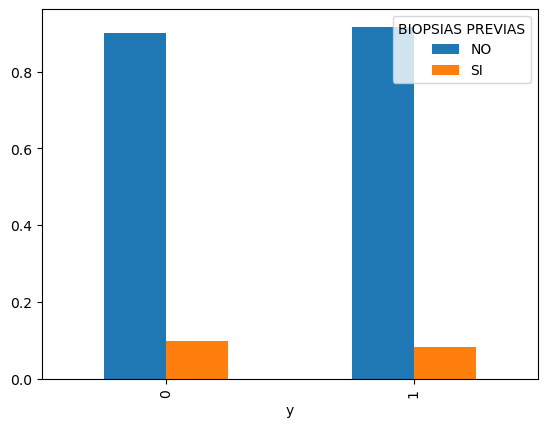

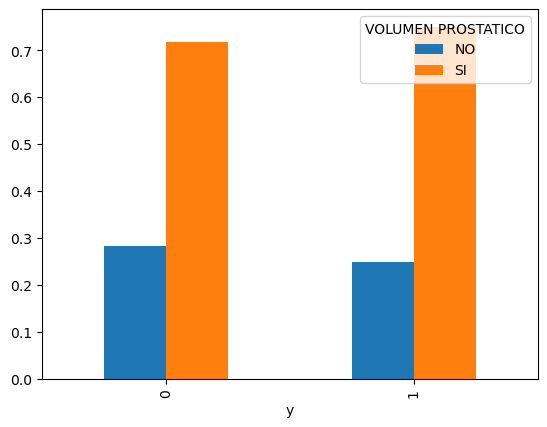

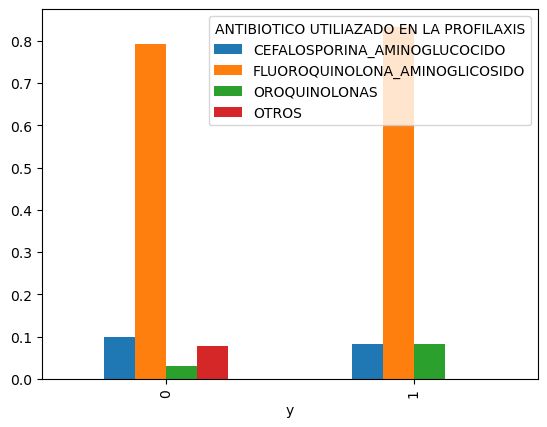

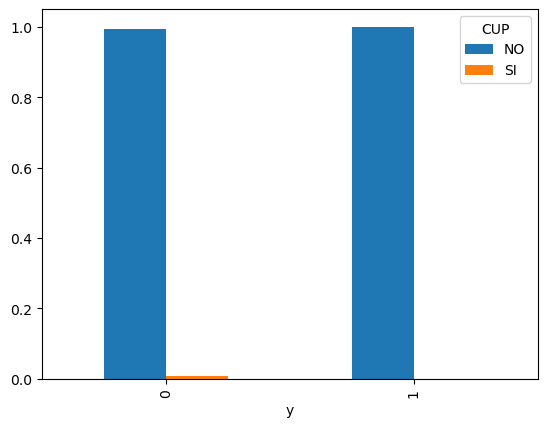

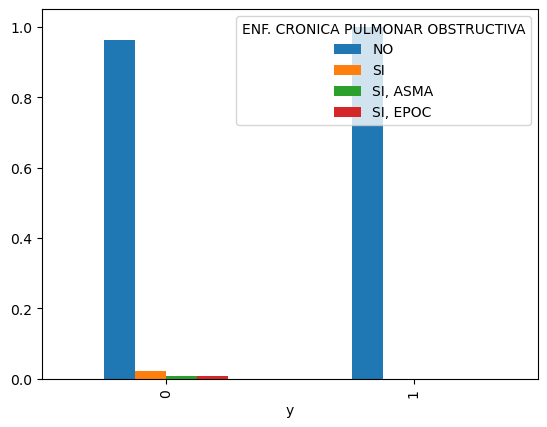

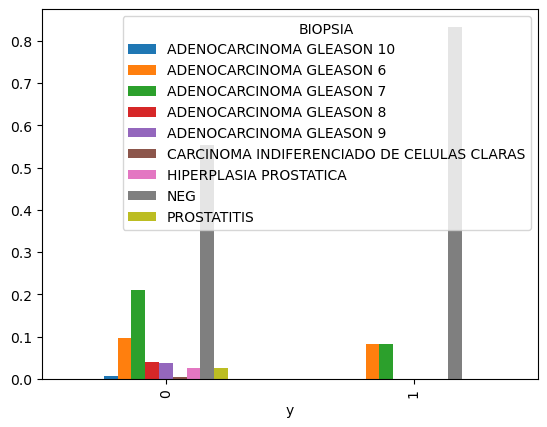

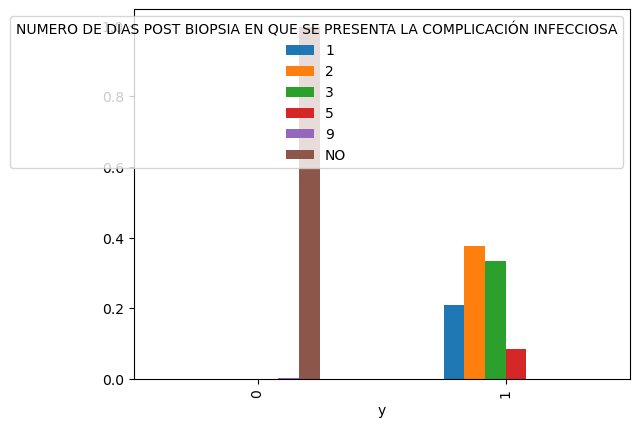

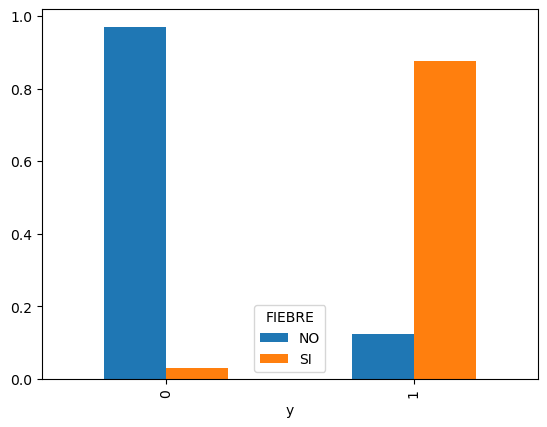

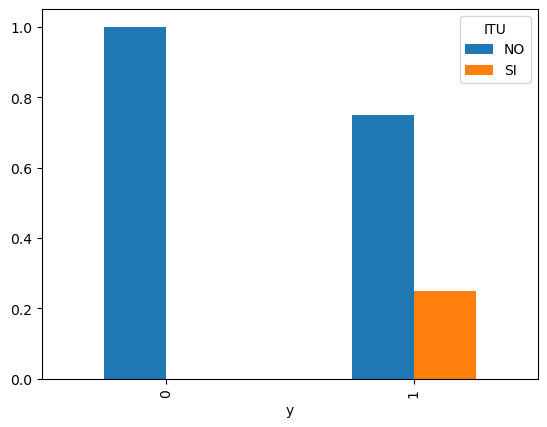

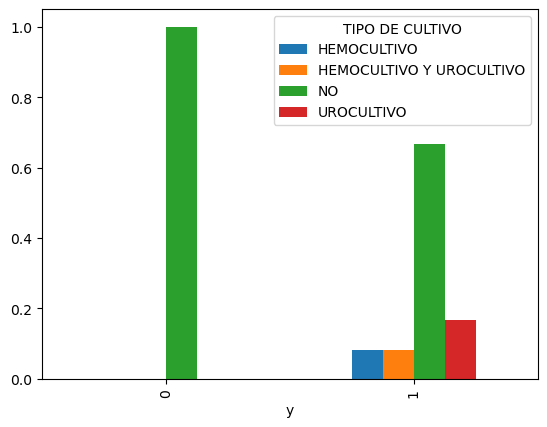

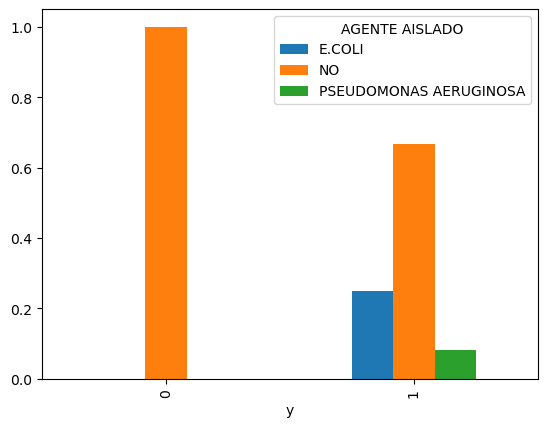

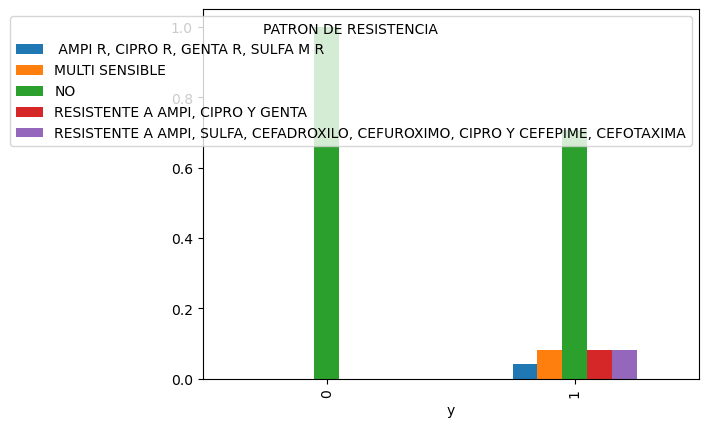

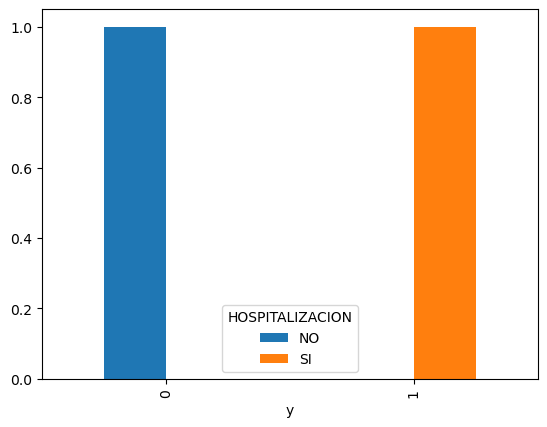

In [23]:
cat_cols = data.select_dtypes(include=['object']).columns
for i, col in enumerate(cat_cols):  
  pd.crosstab(data['y'], data[col], normalize="index").plot(kind='bar')

#### Some considerations:
- The values of the categorical variables are similar between the positive and negative "y" values. This for "HOSPITALIZACION ULTIMO MES", "BIOPSIAS PREVIAS", "VOLUMEN PROSTATICO", "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS", "CUP", "ENF. CRONICA PULMONAR OBSTRUCTIVA" and "PATRON DE RESISTENCIA". We dind't find any correlation between these variables and y.

- We found some correlation between "y" and "BIOPSIA", "FIEBRE", "ITU", "TIPO DE CULTIVO", "DIABETES" and "AGENTE AISLADO".

In [24]:
data.drop(columns=['HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'PATRON DE RESISTENCIA'], inplace=True)
data

,EDAD,DIABETES,PSA,NUMERO DE MUESTRAS TOMADAS,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,HOSPITALIZACION,y
0,53,NO,4.0,12,NEG,1,SI,NO,NO,NO,SI,1
1,56,NO,7.7,12,NEG,1,SI,NO,NO,NO,SI,1
2,57,NO,29.0,24,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,SI,1
3,56,NO,7.0,12,NEG,1,SI,NO,NO,NO,SI,1
4,55,NO,29.0,24,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,SI,1
...,...,...,...,...,...,...,...,...,...,...,...,...
559,57,NO,4.8,12,NEG,NO,NO,NO,NO,NO,NO,0
560,75,NO,75.0,12,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,0
561,78,NO,9.3,12,NEG,NO,NO,NO,NO,NO,NO,0
562,67,NO,6.0,12,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,0


### Finally, the values relevant for our next model are:
- EDAD
- DIABETES 
- PSA
- NUMERO DE MUESTRAS TOMADAS
- BIOPSIA
- NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
- FIEBRE
- ITU
- TIPO DE CULTIVO	AGENTE AISLADO